In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model 
import scipy.stats as stats
import pylab
from scipy.stats import shapiro

# H4O Data Analysis Page

By: Louis

In [ ]:
df = pd.read_csv('h4o_2023_data_updated.csv')

Display few columns of data for checking

In [76]:
print(df.head())
print(df.columns)

   science_id            timestamp        lat         lon  temperature_kelvin  \
0           1  2023-07-28 15:00:00  32.914105 -117.100013              300.71   
1           1  2023-07-28 15:00:02  32.914105 -117.100012              300.96   
2           1  2023-07-28 15:00:04  32.914105 -117.100012              301.27   
3           1  2023-07-28 15:00:06  32.914107 -117.100014              301.52   
4           1  2023-07-28 15:00:08  32.914107 -117.100014              301.96   

       ph  do_percent  orp_mV  
0  7.7525         NaN     NaN  
1  7.7500         NaN     NaN  
2  7.2500         NaN     NaN  
3  7.7500         NaN     NaN  
4  7.7500         NaN     NaN  
Index(['science_id', 'timestamp', 'lat', 'lon', 'temperature_kelvin', 'ph',
       'do_percent', 'orp_mV'],
      dtype='object')


# Scatter Matrix 

/Users/yaolu/anaconda3/envs/python_dashboard/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


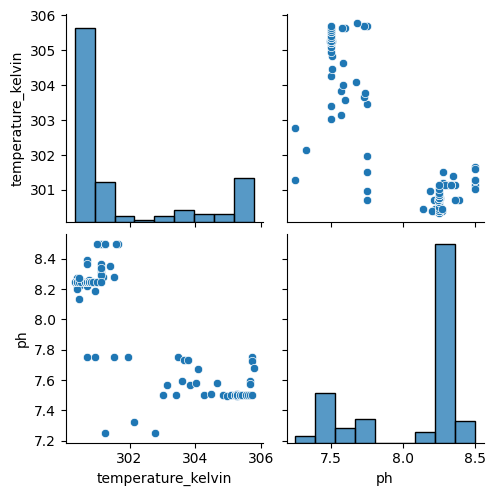

In [79]:
df_2 = df.copy()
df_2 = df_2.drop(columns=['science_id', 'timestamp', 'lat', 'lon', 'do_percent', 'orp_mV'])
#do and orp measurement is not successful because both meters are borken
sns.pairplot(df_2)
plt.show()


# Model Goodness of Fit

# Assumptions for Linear Regression


In [11]:
corr_matrix = df.corr()

/var/folders/jx/3_r5f4pd6vq1ycdjl0hfysqh0000gn/T/ipykernel_56989/3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Correlation Matrix:

In [12]:
print(corr_matrix)

                    science_id       lat       lon  temperature_kelvin  \
science_id                 NaN       NaN       NaN                 NaN   
lat                        NaN  1.000000 -0.870769           -0.462680   
lon                        NaN -0.870769  1.000000            0.592907   
temperature_kelvin         NaN -0.462680  0.592907            1.000000   
ph                         NaN  0.326695 -0.460716           -0.863550   
do_percent                 NaN       NaN       NaN                 NaN   
orp_mV                     NaN       NaN       NaN                 NaN   

                          ph  do_percent  orp_mV  
science_id               NaN         NaN     NaN  
lat                 0.326695         NaN     NaN  
lon                -0.460716         NaN     NaN  
temperature_kelvin -0.863550         NaN     NaN  
ph                  1.000000         NaN     NaN  
do_percent               NaN         NaN     NaN  
orp_mV                   NaN         NaN     NaN  

# Linear Regression Summary:

In [43]:
l1 = np.array(df['temperature_kelvin']).reshape(-1,1)
l2 = np.array(df['ph']).reshape(-1,1)
regr = LinearRegression()
regr.fit(l1, l2)
model = ols('ph ~ temperature_kelvin', data=df)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ph   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.88e-46
Time:                        10:31:55   Log-Likelihood:                 54.107
No. Observations:                 152   AIC:                            -104.2
Df Residuals:                     150   BIC:                            -98.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             55.6119      2.267     24.530      0.000      51.132      60.091
temperature_kelvin    -0.1576      0.008    -20.974      0.000      -0.172      -0.143
==============================================================================
Omnibus:                       70.719   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.603
Skew:                          -1.554   Prob(JB):                     1.26e-91
Kurtosis:                      10.512   Cond. No.                     4.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some analysis we can pull out from the analysis summary page:
    R^2 indicates how the regression predictions fits the data. Since R-squared value is pretty close to 1. This indicates that the models fits the response data around its mean
    

In [63]:
sc = StandardScaler()
df_3 = sc.fit_transform(l2)


In [64]:
df_3_train, df_3_test, l1_train, l1_test = train_test_split(df_3, l1,random_state = 0,test_size=0.25)

In [130]:
regr = linear_model.LinearRegression()
regr.fit(df_3_train,l1_train)
l1_pred = regr.predict(df_3_train)

[[ 0.55394984]
 [ 0.73245077]
 [-1.65499916]
 [ 0.55394984]
 [-1.67731177]
 [ 0.55394984]
 [ 0.55394984]
 [-2.42106564]
 [ 0.44238676]
 [-1.13437145]
 [-0.9335579 ]
 [ 0.55394984]
 [ 0.89607662]
 [ 0.63576277]
 [ 0.53907476]
 [ 0.55394984]
 [ 1.29770371]
 [ 0.680388  ]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.2192606 ]
 [ 0.4126366 ]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [-0.97818313]
 [ 0.55394984]
 [ 0.55394984]
 [-1.66987423]
 [-1.43931053]
 [ 0.55394984]
 [-0.9335579 ]
 [ 0.62088769]
 [ 0.55394984]
 [-2.42106564]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [-0.99305821]
 [ 1.29770371]
 [ 0.56882492]
 [ 0.62088769]
 [ 0.55394984]
 [ 0.55394984]
 [-1.3946853 ]
 [ 0.55394984]
 [ 0.55394984]
 [-1.00793329]
 [ 0.55394984]
 [-0.9335579 ]
 [ 0.55394984]
 [ 0.8142637 ]
 [-1.67731177]
 [-0.9335579 ]
 [ 0.55394984]
 [-1.67731177]
 [-1.3946853 ]
 [-2.21281456]
 [ 0.55394984]
 [ 0.85888

In [66]:
print("R squared: {}".format(r2_score(y_true=l1_train, y_pred=l1_pred)))


R squared: 0.7088375474459365


The R-squared value here indicates that the training data is a good fit for the predicted value.


# Mean of Residuals

In [67]:
residuals = l1_train - l1_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))



Mean of Residuals -4.5873636273634536e-14


The mean of residuals refers to the average value of the differences between the observed data points and the corresponding predicted values in a statistical model. A mean of residuals close to zero indicates that the model is performing well, as the average error between the predicted and observed values is minimal. So our model is in a good fit since it is very close to zero.


# Constant Variance Assumptions(Homoscedasticity)

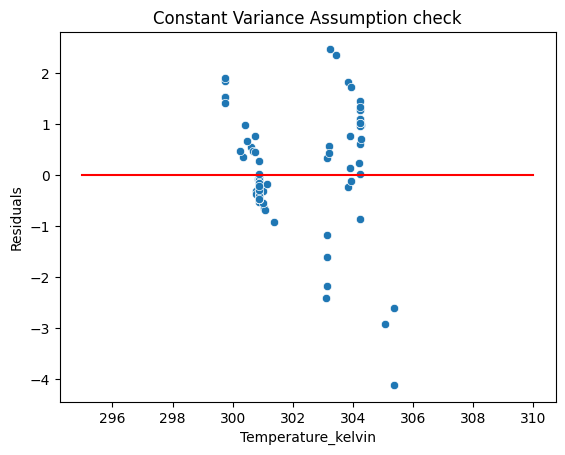

In [84]:
p = sns.scatterplot(x=l1_pred.flatten(), y=residuals.flatten())
plt.xlabel('Temperature_kelvin')
plt.ylabel('Residuals')
p = sns.lineplot(x=[295,310], y=[0,0], color='red')
plt.title('Constant Variance Assumption check')
plt.show()


Constant Variance Assumption assumes that the variance of the residuals (the differences between the observed values and the predicted values) remains constant across all levels of the predictor variables. We can see in our models the data distributed more to the top than bottom. This indicates our models might not be a good fit for constant variance assumption check. This may leads to some bias and inefficient measurement for our data. 

# Normality Assumption

/var/folders/jx/3_r5f4pd6vq1ycdjl0hfysqh0000gn/T/ipykernel_56989/1008037106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


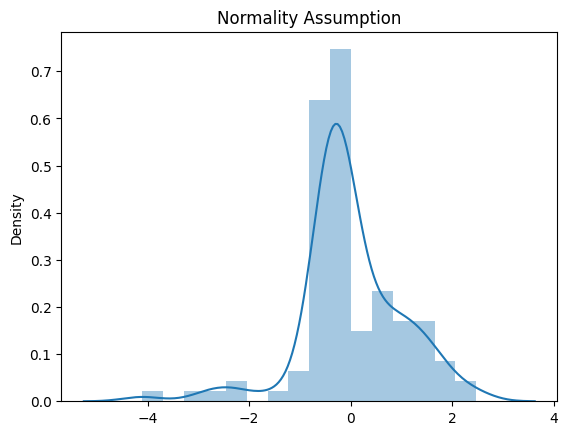

In [73]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality Assumption')

A normal distribution should have 1/3 of the data be in the tails and 2/3 be in the center of the graphs. As we can see in our models, majority of our data is located in the center of our model. This indicates that our models might not be evenly distrubuted. 

# Quantile-Quantile or QQ Plot :
Quantile-Quantile or in short Q-Q plot, in simple terms is method to compare two distributions. In a more formal terms, it is a technique to compare whether two sets of sample points are from or they follow same distributions.

In [90]:
rvs = stats.norm(loc=0, scale=1)


In [91]:
normal_sample = rvs.rvs(size=100000)

In [115]:
print(regr)

LinearRegression()


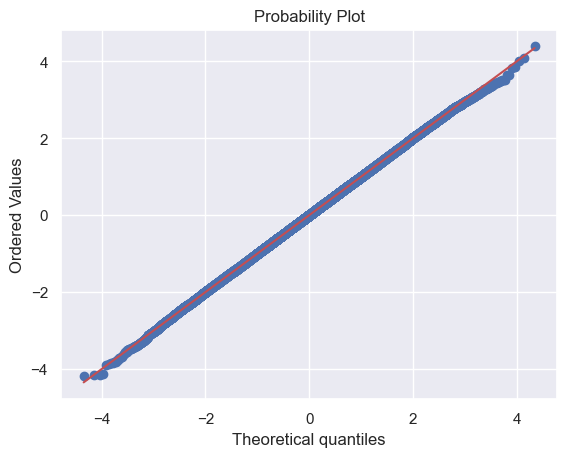

[-0.89389489  0.63676309  1.69911494 ... -0.47792179 -0.77740029
 -2.50243835]


In [96]:
stats.probplot(normal_sample, dist="norm", plot=plt)
plt.show()
print(normal_sample)


[-0.31129934 -0.31379934 -0.81379934 -0.31379934 -0.31379934 -0.74379934
 -0.81379934 -0.56379934 -0.49629934 -0.56379934 -0.31379934 -0.46879934
 -0.33379934 -0.32879934 -0.49629934 -0.48379934 -0.39379934 -0.56379934
 -0.55629934 -0.48379934 -0.56129934 -0.56629934 -0.56379934 -0.56379934
 -0.56379934 -0.56379934 -0.56379934 -0.55629934 -0.57129934 -0.56379934
 -0.56379934 -0.56379934 -0.56379934 -0.56379934 -0.56379934 -0.56379934
 -0.56379934 -0.56379934 -0.46879934 -0.49129934 -0.31379934 -0.33879934
 -0.56379934 -0.38129934  0.18620066  0.18620066  0.18620066  0.32620066
  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066
  0.18620066  0.15370066  0.18620066  0.18620066  0.18620066  0.18620066
  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066
  0.18620066  0.18620066  0.18620066  0.07370066  0.18620066  0.14870066
  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066  0.18620066
  0.18620066  0.18620066  0.18620066  0.18620066  0

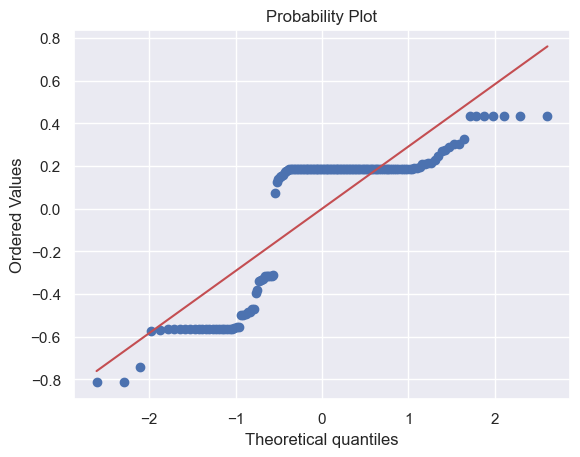

In [113]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['temperature_kelvin'])
lst = list(df_3['ph'])

lst = lst-np.mean(lst)
print(lst)
stats.probplot(lst, dist="norm", plot=plt)
plt.show()


We can see that the blue lines and red lines are not in the same distributing.

# Shapiro-Wilk Test
Shpiro-Wilk Test examines how close the sample data fit to a normal distribution

In [108]:
stat, p = shapiro(df_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks standard normal distribution')
else:
    print('Sample does not looks standard normal distribution')

Statistics=0.729, p=0.000
Sample does not looks standard normal distribution


In [109]:
filtered_data = df_3[df_3['ph'] >= 8]
filtered_data.head()

,ph
44,8.25
45,8.25
46,8.25
47,8.39
48,8.25


In [116]:
print(regr.coef_, regr.intercept_)

[[-1.51347435]] [301.71159747]


# QQ Plot and Shapiro-Wilk Test with the filtered data

In [142]:

print(df_3_train)

stats.probplot(df_3, dist="norm", plot=plt)
plt.show()

[[ 0.55394984]
 [ 0.73245077]
 [-1.65499916]
 [ 0.55394984]
 [-1.67731177]
 [ 0.55394984]
 [ 0.55394984]
 [-2.42106564]
 [ 0.44238676]
 [-1.13437145]
 [-0.9335579 ]
 [ 0.55394984]
 [ 0.89607662]
 [ 0.63576277]
 [ 0.53907476]
 [ 0.55394984]
 [ 1.29770371]
 [ 0.680388  ]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.2192606 ]
 [ 0.4126366 ]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [-0.97818313]
 [ 0.55394984]
 [ 0.55394984]
 [-1.66987423]
 [-1.43931053]
 [ 0.55394984]
 [-0.9335579 ]
 [ 0.62088769]
 [ 0.55394984]
 [-2.42106564]
 [ 0.55394984]
 [ 0.55394984]
 [ 0.55394984]
 [-0.99305821]
 [ 1.29770371]
 [ 0.56882492]
 [ 0.62088769]
 [ 0.55394984]
 [ 0.55394984]
 [-1.3946853 ]
 [ 0.55394984]
 [ 0.55394984]
 [-1.00793329]
 [ 0.55394984]
 [-0.9335579 ]
 [ 0.55394984]
 [ 0.8142637 ]
 [-1.67731177]
 [-0.9335579 ]
 [ 0.55394984]
 [-1.67731177]
 [-1.3946853 ]
 [-2.21281456]
 [ 0.55394984]
 [ 0.85888

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 152 and the array at index 1 has size 1

In [111]:
stat, p = shapiro(filtered_data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks standard normal distribution')
else:
    print('Sample does not looks standard normal distribution')

Statistics=0.524, p=0.000
Sample does not looks standard normal distribution
